In [122]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

In [123]:
df = pd.read_csv('labeled_data.csv')
pd.set_option("display.max_colwidth", None)

# hate = 0
# offensive = 1
# clean = 2

In [124]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [125]:
# drop unnecessary column
df = df.drop(columns=['count','hate_speech','offensive_language','neither','Unnamed: 0'], axis=1)

In [126]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [127]:
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [128]:
df.isnull().any()

class    False
tweet    False
dtype: bool

In [129]:
df.duplicated().sum()

0

# Converting to lowercase

In [130]:
df['clean_tweet'] = df['tweet'].str.lower()
df.head(50)

,class,tweet,clean_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,!!! rt @mayasolovely: as a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,!!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuck a bitch and she start to cry? you be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,!!!!!!!!! rt @c_g_anderson: @viva_based she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,!!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""","!!!!!!!!!!!!!!!!!!""@t_madison_x: the shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"""
6,1,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!""","!!!!!!""@__brighterdays: i can not just sit up and hate on another bitch .. i got too much shit going on!"""
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;,!!!!&#8220;@selfiequeenbri: cause i'm tired of you big bitches coming for us skinny girls!!&#8221;
8,1,""" &amp; you might not get ya bitch back &amp; thats that """,""" &amp; you might not get ya bitch back &amp; thats that """
9,1,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch",""" @rhythmixx_ :hobbies include: fighting mariam""\n\nbitch"


In [10]:
df.sample(frac=1).head() # shaffaling the tweet

,class,tweet,clean_tweet
9009,1,Everyone liked evil me. This me is a pussy. Fuck compassion.,everyone liked evil me. this me is a pussy. fuck compassion.
23969,1,"i am one of those people who needs reassurance so damn often, that i'm not the ugliest bitch in the world.","i am one of those people who needs reassurance so damn often, that i'm not the ugliest bitch in the world."
20246,1,RT @tupactopus: bad bitches get in free night at weenie hut jrs,rt @tupactopus: bad bitches get in free night at weenie hut jrs
16076,1,"RT @Krislisisms: Grow up, bitch.","rt @krislisisms: grow up, bitch."
2235,1,2+2 not knowing wtf it is bitch,2+2 not knowing wtf it is bitch


# Removal of Pattern & Punctuations


In [11]:
# removes pattern in the input text
def remove_pattern(text, pattern):
    r = re.findall(pattern, text)
    for word in r:
        text = re.sub(word, "", text)
    return text

In [12]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head()

,class,tweet,clean_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,!!! RT : As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,!!!!! RT : boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitch and she start to cry? You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,!!!!!!!!! RT : she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,!!!!!!!!!!!!! RT : The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punctuation(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('','',punctuations))

In [15]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: remove_punctuation(x))
df.head()

,class,tweet,clean_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,RT As a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,RT boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,RT Dawg RT You ever fuck a bitch and she start to cry You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,RT she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,RT The shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361


# Removal of Stopwords


In [16]:
# lower cast again
df['clean_tweet'] = df['clean_tweet'].str.lower()
df.head(50)

,class,tweet,clean_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,rt as a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,rt boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,rt dawg rt you ever fuck a bitch and she start to cry you be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,rt she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,rt the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""",the shit just blows meclaim you so faithful and down for somebody but still fucking with hoes 128514128514128514
6,1,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!""",i can not just sit up and hate on another bitch i got too much shit going on
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;,8220 cause im tired of you big bitches coming for us skinny girls8221
8,1,""" &amp; you might not get ya bitch back &amp; thats that """,amp you might not get ya bitch back amp thats that
9,1,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch",hobbies include fighting mariam\n\nbitch


In [17]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [18]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(tweets):
    return " ".join([word for word in tweets.split() if word not in STOPWORDS])

In [19]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: remove_stopwords(x))
df.head(50)

,class,tweet,clean_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,rt woman shouldnt complain cleaning house amp man always take trash
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,rt boy dats coldtyga dwn bad cuffin dat hoe 1st place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,rt dawg rt ever fuck bitch start cry confused shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,rt look like tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,rt shit hear might true might faker bitch told ya 57361
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""",shit blows meclaim faithful somebody still fucking hoes 128514128514128514
6,1,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!""",sit hate another bitch got much shit going
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;,8220 cause im tired big bitches coming us skinny girls8221
8,1,""" &amp; you might not get ya bitch back &amp; thats that """,amp might get ya bitch back amp thats
9,1,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch",hobbies include fighting mariam bitch


# Removal of Frequent Words


In [20]:
from collections import Counter
word_count = Counter()

for tweet in df['clean_tweet']:
    for word in tweet.split():
        word_count[word] +=1
        
word_count.most_common(30)

[('bitch', 8122),
 ('rt', 7590),
 ('bitches', 3045),
 ('like', 2760),
 ('hoes', 2329),
 ('pussy', 2073),
 ('im', 2063),
 ('hoe', 1866),
 ('dont', 1749),
 ('8220', 1592),
 ('ass', 1562),
 ('get', 1428),
 ('fuck', 1406),
 ('got', 1289),
 ('u', 1272),
 ('shit', 1249),
 ('nigga', 1191),
 ('aint', 1157),
 ('trash', 1125),
 ('lol', 1033),
 ('amp', 839),
 ('know', 805),
 ('niggas', 788),
 ('one', 697),
 ('love', 695),
 ('cant', 661),
 ('yall', 646),
 ('fucking', 626),
 ('go', 620),
 ('thats', 610)]

In [21]:
FREQUENT_WORDS = set(word for (word, wc) in word_count.most_common(3))
FREQUENT_WORDS

{'bitch', 'bitches', 'rt'}

In [22]:
FREQUENT_WORDS = 'rt' 
FREQUENT_WORDS

'rt'

In [23]:
def remove_frequent_word(tweets):
    return " ".join([word for word in tweets.split() if word not in FREQUENT_WORDS])

In [24]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: remove_frequent_word(x))
df.head()

,class,tweet,clean_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,woman shouldnt complain cleaning house amp man always take trash
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,boy dats coldtyga dwn bad cuffin dat hoe 1st place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,dawg ever fuck bitch start cry confused shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,look like tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,shit hear might true might faker bitch told ya 57361


In [25]:
FREQUENT_WORDS = set(word for (word, wc) in word_count.most_common(3))
FREQUENT_WORDS

{'bitch', 'bitches', 'rt'}

## Removal of Rare Words
 

In [26]:
RARE_WORDS = set(word for word in word_count.most_common()[:-10:-1])
RARE_WORDS

{('9757', 1),
 ('coll', 1),
 ('dahlia', 1),
 ('eileen', 1),
 ('httptcoh0dyebvnzb', 1),
 ('hymns8221', 1),
 ('muthafin', 1),
 ('ntac', 1),
 ('scriptures', 1)}

In [27]:
len(word_count)

28297

In [28]:
def remove_rare_word(tweets):
    return " ".join([word for word in tweets.split() if word not in RARE_WORDS])

In [29]:
# df['clean_tweet'] = df['clean_tweet'].apply(lambda x: remove_rare_word(x))
# df.head()

In [30]:

def remove_special_chars(tweets):
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets = re.sub('\s+', ' ', tweets)
    return tweets

In [31]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: remove_special_chars(x))
df.head()

,class,tweet,clean_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,woman shouldnt complain cleaning house amp man always take trash
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,boy dats coldtyga dwn bad cuffin dat hoe st place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,dawg ever fuck bitch start cry confused shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,look like tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,shit hear might true might faker bitch told ya


# Stemming



In [32]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def stem_words(tweets):
    return " ".join([ps.stem(word) for word in tweets.split()])

In [33]:
df['stemmed_tweet'] = df['clean_tweet'].apply(lambda x: stem_words(x))
df.head(50)

,class,tweet,clean_tweet,stemmed_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,woman shouldnt complain cleaning house amp man always take trash,woman shouldnt complain clean hous amp man alway take trash
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,boy dats coldtyga dwn bad cuffin dat hoe st place,boy dat coldtyga dwn bad cuffin dat hoe st place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,dawg ever fuck bitch start cry confused shit,dawg ever fuck bitch start cri confus shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,look like tranny,look like tranni
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,shit hear might true might faker bitch told ya,shit hear might true might faker bitch told ya
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""",shit blows meclaim faithful somebody still fucking hoes,shit blow meclaim faith somebodi still fuck hoe
6,1,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!""",sit hate another bitch got much shit going,sit hate anoth bitch got much shit go
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;,cause im tired big bitches coming us skinny girls,caus im tire big bitch come us skinni girl
8,1,""" &amp; you might not get ya bitch back &amp; thats that """,amp might get ya bitch back amp thats,amp might get ya bitch back amp that
9,1,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch",hobbies include fighting mariam bitch,hobbi includ fight mariam bitch


# Lemmatization & POS Tagging


In [34]:
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lammatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

def lemmatize_words(tweets):
    #find pos tags
    
    pos_text = pos_tag(tweets.split())
    return " ".join(lammatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text)

In [35]:
df['lemmatized_tweet'] = df['clean_tweet'].apply(lambda x: lemmatize_words(x))
df.head(50)

,class,tweet,clean_tweet,stemmed_tweet,lemmatized_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,woman shouldnt complain cleaning house amp man always take trash,woman shouldnt complain clean hous amp man alway take trash,woman shouldnt complain cleaning house amp man always take trash
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,boy dats coldtyga dwn bad cuffin dat hoe st place,boy dat coldtyga dwn bad cuffin dat hoe st place,boy dat coldtyga dwn bad cuffin dat hoe st place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,dawg ever fuck bitch start cry confused shit,dawg ever fuck bitch start cri confus shit,dawg ever fuck bitch start cry confuse shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,look like tranny,look like tranni,look like tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,shit hear might true might faker bitch told ya,shit hear might true might faker bitch told ya,shit hear might true might faker bitch tell ya
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""",shit blows meclaim faithful somebody still fucking hoes,shit blow meclaim faith somebodi still fuck hoe,shit blow meclaim faithful somebody still fuck hoe
6,1,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!""",sit hate another bitch got much shit going,sit hate anoth bitch got much shit go,sit hate another bitch get much shit go
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;,cause im tired big bitches coming us skinny girls,caus im tire big bitch come us skinni girl,cause im tire big bitch come u skinny girl
8,1,""" &amp; you might not get ya bitch back &amp; thats that """,amp might get ya bitch back amp thats,amp might get ya bitch back amp that,amp might get ya bitch back amp thats
9,1,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch",hobbies include fighting mariam bitch,hobbi includ fight mariam bitch,hobby include fight mariam bitch


In [36]:
df.head(50)

,class,tweet,clean_tweet,stemmed_tweet,lemmatized_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,woman shouldnt complain cleaning house amp man always take trash,woman shouldnt complain clean hous amp man alway take trash,woman shouldnt complain cleaning house amp man always take trash
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,boy dats coldtyga dwn bad cuffin dat hoe st place,boy dat coldtyga dwn bad cuffin dat hoe st place,boy dat coldtyga dwn bad cuffin dat hoe st place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,dawg ever fuck bitch start cry confused shit,dawg ever fuck bitch start cri confus shit,dawg ever fuck bitch start cry confuse shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,look like tranny,look like tranni,look like tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,shit hear might true might faker bitch told ya,shit hear might true might faker bitch told ya,shit hear might true might faker bitch tell ya
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""",shit blows meclaim faithful somebody still fucking hoes,shit blow meclaim faith somebodi still fuck hoe,shit blow meclaim faithful somebody still fuck hoe
6,1,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!""",sit hate another bitch got much shit going,sit hate anoth bitch got much shit go,sit hate another bitch get much shit go
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;,cause im tired big bitches coming us skinny girls,caus im tire big bitch come us skinni girl,cause im tire big bitch come u skinny girl
8,1,""" &amp; you might not get ya bitch back &amp; thats that """,amp might get ya bitch back amp thats,amp might get ya bitch back amp that,amp might get ya bitch back amp thats
9,1,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch",hobbies include fighting mariam bitch,hobbi includ fight mariam bitch,hobby include fight mariam bitch


# # Spelling Correction


In [37]:
!pip install pyspellchecker

In [38]:
text = 'natur is a beuty'


In [39]:
from spellchecker import SpellChecker
spell = SpellChecker()

def correct_spellings(tweets):
    corrected_tweets = []
    misspelled_tweets = spell.unknown(tweets.split())
    print(f'Misspelled word : {misspelled_tweets}')
    for word in tweets.split():
        if word in misspelled_tweets:
            corrected_tweets.append(spell.correction(word))
        else:
            corrected_tweets.append(word)
    return " ".join(corrected_tweets)

In [40]:
# df['lemmatized_tweet'] = df['lemmatized_tweet'].apply(lambda x: correct_spellings(x))
# df.head(50)

# Exploratory Data Analysis

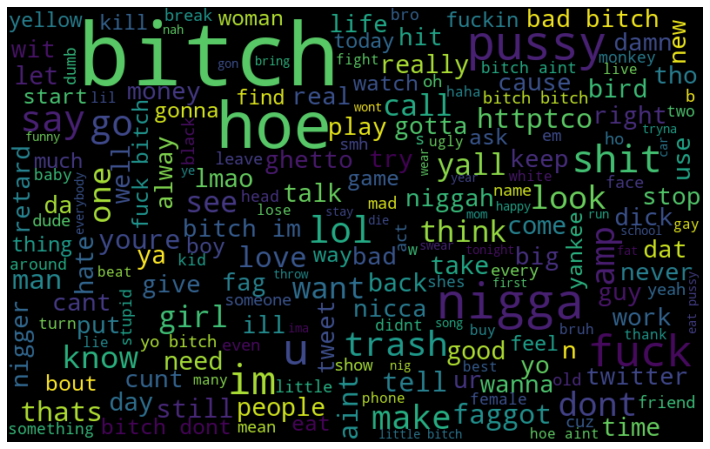

In [41]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['lemmatized_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

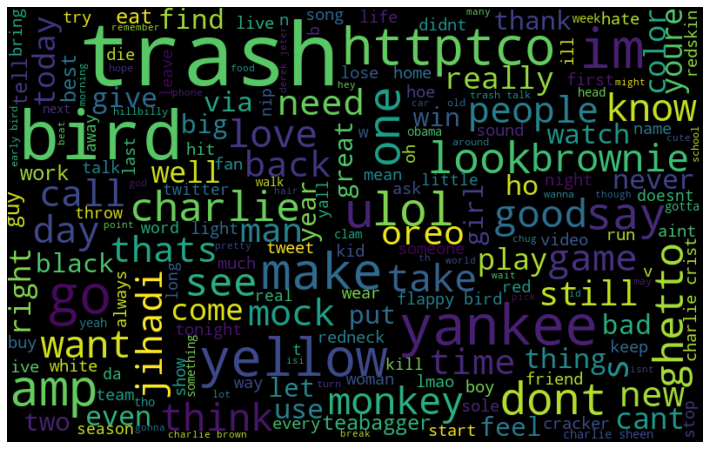

In [42]:
#frequent words visualization for Clean
all_words = " ".join([sentence for sentence in df['lemmatized_tweet'][df['class']==2]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

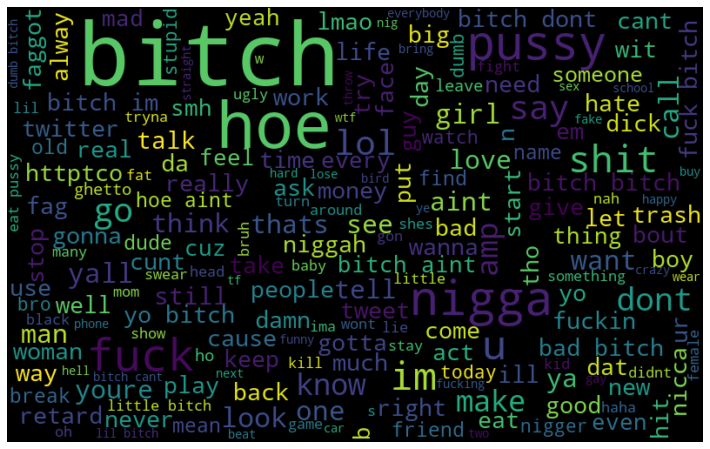

In [43]:
#frequent words visualization for offensive
all_words = " ".join([sentence for sentence in df['lemmatized_tweet'][df['class']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

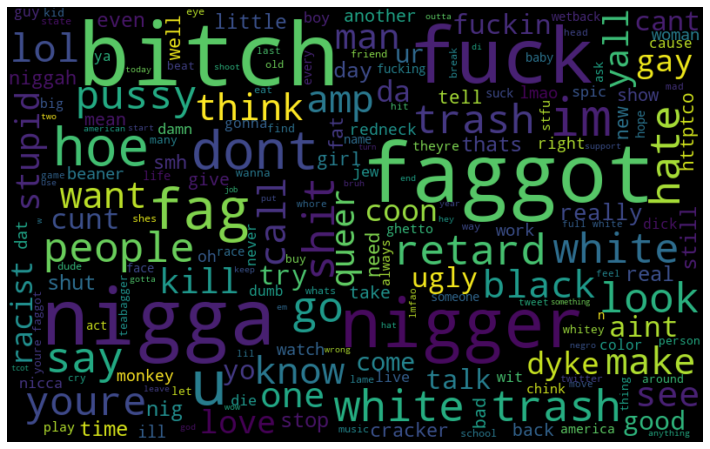

In [44]:
#frequent words visualization for Hate
all_words = " ".join([sentence for sentence in df['lemmatized_tweet'][df['class']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [45]:
df.head(50)

,class,tweet,clean_tweet,stemmed_tweet,lemmatized_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,woman shouldnt complain cleaning house amp man always take trash,woman shouldnt complain clean hous amp man alway take trash,woman shouldnt complain cleaning house amp man always take trash
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,boy dats coldtyga dwn bad cuffin dat hoe st place,boy dat coldtyga dwn bad cuffin dat hoe st place,boy dat coldtyga dwn bad cuffin dat hoe st place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,dawg ever fuck bitch start cry confused shit,dawg ever fuck bitch start cri confus shit,dawg ever fuck bitch start cry confuse shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,look like tranny,look like tranni,look like tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,shit hear might true might faker bitch told ya,shit hear might true might faker bitch told ya,shit hear might true might faker bitch tell ya
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""",shit blows meclaim faithful somebody still fucking hoes,shit blow meclaim faith somebodi still fuck hoe,shit blow meclaim faithful somebody still fuck hoe
6,1,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!""",sit hate another bitch got much shit going,sit hate anoth bitch got much shit go,sit hate another bitch get much shit go
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;,cause im tired big bitches coming us skinny girls,caus im tire big bitch come us skinni girl,cause im tire big bitch come u skinny girl
8,1,""" &amp; you might not get ya bitch back &amp; thats that """,amp might get ya bitch back amp thats,amp might get ya bitch back amp that,amp might get ya bitch back amp thats
9,1,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch",hobbies include fighting mariam bitch,hobbi includ fight mariam bitch,hobby include fight mariam bitch


In [46]:
from collections import Counter


In [47]:
hate_tweets = Counter()
for tweet in df['lemmatized_tweet'][df['class']==0]:
    for word in tweet.split():
        hate_tweets[word] +=1
        

In [48]:
offensive_tweets = Counter()
for tweet in df['lemmatized_tweet'][df['class']==1]:
    for word in tweet.split():
        offensive_tweets[word] +=1
  

In [49]:
clean_tweets = Counter()
for tweet in df['lemmatized_tweet'][df['class']==2]:
    for word in tweet.split():
        clean_tweets[word] +=1
  

In [50]:
offensive_tweets.most_common(5)

[('bitch', 11084),
 ('hoe', 4141),
 ('get', 2603),
 ('like', 2361),
 ('pussy', 2167)]

In [51]:
clean_tweets.most_common(5)

[('trash', 695), ('bird', 461), ('get', 319), ('like', 310), ('yankee', 270)]

In [52]:
hate_tweets.most_common(5)

[('bitch', 266), ('faggot', 247), ('fuck', 208), ('nigga', 191), ('like', 172)]

In [53]:
df.head()

,class,tweet,clean_tweet,stemmed_tweet,lemmatized_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,woman shouldnt complain cleaning house amp man always take trash,woman shouldnt complain clean hous amp man alway take trash,woman shouldnt complain cleaning house amp man always take trash
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,boy dats coldtyga dwn bad cuffin dat hoe st place,boy dat coldtyga dwn bad cuffin dat hoe st place,boy dat coldtyga dwn bad cuffin dat hoe st place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,dawg ever fuck bitch start cry confused shit,dawg ever fuck bitch start cri confus shit,dawg ever fuck bitch start cry confuse shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,look like tranny,look like tranni,look like tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,shit hear might true might faker bitch told ya,shit hear might true might faker bitch told ya,shit hear might true might faker bitch tell ya


In [54]:
# dictionary to dataframe
freq = nltk.FreqDist(clean_tweets)
d = pd.DataFrame({'clean_tweets': list(freq.keys()), 'Count': list(freq.values())})
d.head()

,clean_tweets,Count
0,woman,30
1,shouldnt,7
2,complain,5
3,cleaning,3
4,house,22


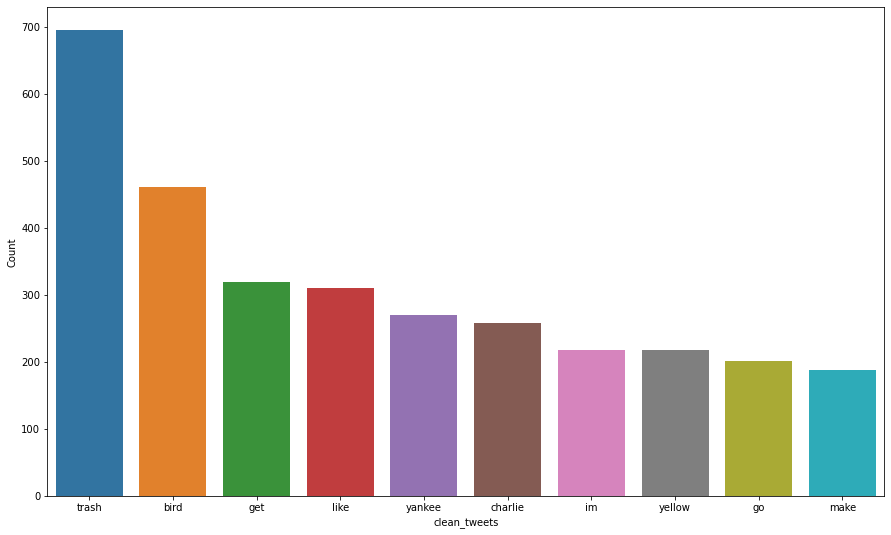

In [55]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15.,9))
sns.barplot(data=d, x="clean_tweets", y="Count")
plt.show()


In [56]:
# dictionary to dataframe
freq = nltk.FreqDist(hate_tweets)
d = pd.DataFrame({'hate_tweets': list(freq.keys()), 'Count': list(freq.values())})
d.head()

,hate_tweets,Count
0,queer,36
1,gaywad,1
2,alsarabsss,1
3,he,20
4,beaner,18


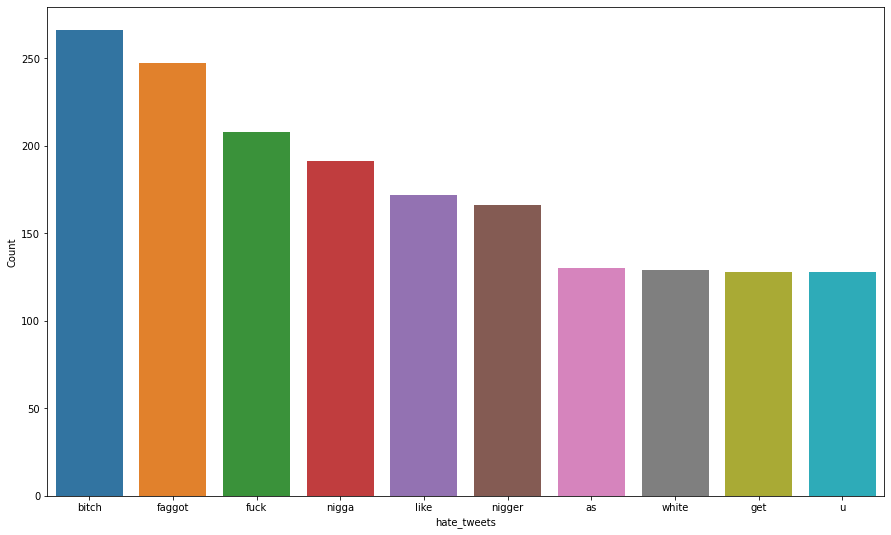

In [57]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15.,9))
sns.barplot(data=d, x="hate_tweets", y="Count")
plt.show()

In [58]:
# dictionary to dataframe
freq = nltk.FreqDist(offensive_tweets)
d = pd.DataFrame({'offensive_tweets': list(freq.keys()), 'Count': list(freq.values())})
d.head()

,offensive_tweets,Count
0,boy,206
1,dat,270
2,coldtyga,1
3,dwn,2
4,bad,545


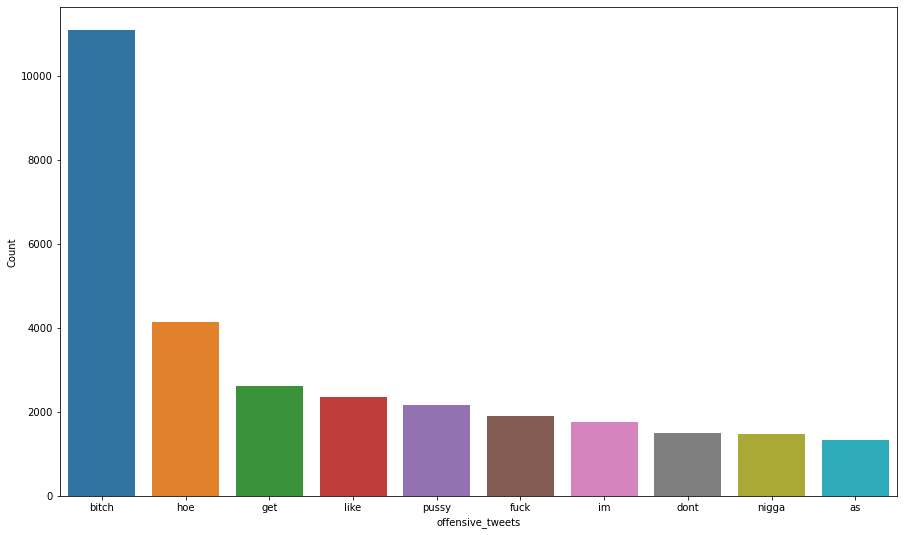

In [59]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15.,9))
sns.barplot(data=d, x="offensive_tweets", y="Count")
plt.show()

# Word2vec
The word2vec algorithm uses a neural network model to learn word associations from a large corpus of text. Once trained, such a model can detect synonymous words or suggest additional words for a partial sentence.

In [60]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [61]:
paragraph = ' '.join(df['lemmatized_tweet'][0:50])

In [62]:
paragraph

'woman shouldnt complain cleaning house amp man always take trash boy dat coldtyga dwn bad cuffin dat hoe st place dawg ever fuck bitch start cry confuse shit look like tranny shit hear might true might faker bitch tell ya shit blow meclaim faithful somebody still fuck hoe sit hate another bitch get much shit go cause im tire big bitch come u skinny girl amp might get ya bitch back amp thats hobby include fight mariam bitch keeks bitch curve everyone lol walk conversation like smh murda gang bitch gang land hoe smoke loser yea go ig bad bitch thing like bitch get bitch nigga miss bitch plz whatever bitch love bitch get cut everyday b black bottle amp bad bitch break bitch cant tell nothing cancel bitch like nino cant see hoe wont change fuck bitch dont even suck dick kermit video bout fuck ig get ya bitch tip toe hardwood floor httptcocou wq l q pussy lip like heaven door hoe hit meet pussy ocean dr give pussy pill need trippy bitch fuck hennessy spend money want bitch business txt old

In [63]:
type(paragraph)

str

In [64]:
from nltk import sent_tokenize, word_tokenize

In [65]:
sentence_tokens = sent_tokenize(paragraph)
sentence_tokens

['woman shouldnt complain cleaning house amp man always take trash boy dat coldtyga dwn bad cuffin dat hoe st place dawg ever fuck bitch start cry confuse shit look like tranny shit hear might true might faker bitch tell ya shit blow meclaim faithful somebody still fuck hoe sit hate another bitch get much shit go cause im tire big bitch come u skinny girl amp might get ya bitch back amp thats hobby include fight mariam bitch keeks bitch curve everyone lol walk conversation like smh murda gang bitch gang land hoe smoke loser yea go ig bad bitch thing like bitch get bitch nigga miss bitch plz whatever bitch love bitch get cut everyday b black bottle amp bad bitch break bitch cant tell nothing cancel bitch like nino cant see hoe wont change fuck bitch dont even suck dick kermit video bout fuck ig get ya bitch tip toe hardwood floor httptcocou wq l q pussy lip like heaven door hoe hit meet pussy ocean dr give pussy pill need trippy bitch fuck hennessy spend money want bitch business txt ol

In [66]:
# split the text into word
word_tokens = word_tokenize(paragraph)
word_tokens

['woman',
 'shouldnt',
 'complain',
 'cleaning',
 'house',
 'amp',
 'man',
 'always',
 'take',
 'trash',
 'boy',
 'dat',
 'coldtyga',
 'dwn',
 'bad',
 'cuffin',
 'dat',
 'hoe',
 'st',
 'place',
 'dawg',
 'ever',
 'fuck',
 'bitch',
 'start',
 'cry',
 'confuse',
 'shit',
 'look',
 'like',
 'tranny',
 'shit',
 'hear',
 'might',
 'true',
 'might',
 'faker',
 'bitch',
 'tell',
 'ya',
 'shit',
 'blow',
 'meclaim',
 'faithful',
 'somebody',
 'still',
 'fuck',
 'hoe',
 'sit',
 'hate',
 'another',
 'bitch',
 'get',
 'much',
 'shit',
 'go',
 'cause',
 'im',
 'tire',
 'big',
 'bitch',
 'come',
 'u',
 'skinny',
 'girl',
 'amp',
 'might',
 'get',
 'ya',
 'bitch',
 'back',
 'amp',
 'thats',
 'hobby',
 'include',
 'fight',
 'mariam',
 'bitch',
 'keeks',
 'bitch',
 'curve',
 'everyone',
 'lol',
 'walk',
 'conversation',
 'like',
 'smh',
 'murda',
 'gang',
 'bitch',
 'gang',
 'land',
 'hoe',
 'smoke',
 'loser',
 'yea',
 'go',
 'ig',
 'bad',
 'bitch',
 'thing',
 'like',
 'bitch',
 'get',
 'bitch',
 'nig

# Model training


In [67]:
tokenizeyd_tweet = df['lemmatized_tweet'].apply(lambda x: x.split())
model = Word2Vec(tokenizeyd_tweet,window=5)
model.train(tokenizeyd_tweet, total_examples=len(df['lemmatized_tweet']), epochs=20)

(2789468, 3954740)

In [68]:
tokenizeyd_tweet[0]

['woman',
 'shouldnt',
 'complain',
 'cleaning',
 'house',
 'amp',
 'man',
 'always',
 'take',
 'trash']

In [69]:
model.wv['take']

array([-1.24712124e-01,  1.75896323e+00,  8.91797423e-01, -6.48221552e-01,
        7.83096671e-01, -3.54447693e-01, -1.06654620e+00, -7.96899021e-01,
        1.06764987e-01, -5.41699290e-01, -8.59602273e-01,  1.11446822e+00,
        1.11240733e+00,  3.45612586e-01, -9.56041634e-01, -4.10739392e-01,
       -5.89554787e-01, -6.49484038e-01, -6.56002879e-01, -8.52278888e-01,
        1.02646314e-01, -6.87380672e-01,  3.48461300e-01, -1.02421653e+00,
        2.77923751e+00, -1.12925482e+00, -8.51798686e-04,  1.06141590e-01,
       -1.78151536e+00, -4.64710772e-01,  7.56292999e-01,  5.87798536e-01,
       -5.19834697e-01, -4.45392370e-01, -4.55139987e-02,  3.23655635e-01,
       -2.80644655e-01,  1.26386195e-01,  8.72076035e-01, -1.62907636e+00,
        6.40705526e-01, -1.11449644e-01,  2.06940746e+00, -1.31532359e+00,
       -1.27466321e-01,  2.41795219e-02, -7.60399327e-02,  6.63528025e-01,
        6.91557527e-01, -2.43276298e-01, -4.75244790e-01, -3.75078231e-01,
        1.44345984e-01, -

In [70]:
model.wv.most_similar("house") 

[('room', 0.5913415551185608),
 ('town', 0.5739598274230957),
 ('across', 0.5738725662231445),
 ('arrest', 0.5482776761054993),
 ('hotel', 0.539011538028717),
 ('target', 0.5120927095413208),
 ('walk', 0.5115208625793457),
 ('around', 0.5083213448524475),
 ('burn', 0.5011765360832214),
 ('door', 0.4978479743003845)]

In [71]:
model.wv.most_similar(positive="house") 

[('room', 0.5913415551185608),
 ('town', 0.5739598274230957),
 ('across', 0.5738725662231445),
 ('arrest', 0.5482776761054993),
 ('hotel', 0.539011538028717),
 ('target', 0.5120927095413208),
 ('walk', 0.5115208625793457),
 ('around', 0.5083213448524475),
 ('burn', 0.5011765360832214),
 ('door', 0.4978479743003845)]

In [72]:
model 

# another try for model

In [73]:
y = df.iloc[:,0:1]
y = y[:500]
y

,class
0,2
1,1
2,1
3,1
4,1
...,...
495,1
496,1
497,1
498,1


In [74]:
x = df['lemmatized_tweet']
x = x[:500]
x

0                           woman shouldnt complain cleaning house amp man always take trash
1                                           boy dat coldtyga dwn bad cuffin dat hoe st place
2                                                dawg ever fuck bitch start cry confuse shit
3                                                                           look like tranny
4                                             shit hear might true might faker bitch tell ya
                                               ...                                          
495                                         im funky as honkey shout tonight cabaret jt tour
496                                                                     im compare kfc pussy
497    im download new personality order new face bitch love goddamn axl rise yell sex robot
498                                im feelin like malcolm middle bitch surround cant miss em
499                                    im gonna piss dimple stop waste

In [75]:
type(y)

pandas.core.frame.DataFrame

In [76]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)

/home/arafat/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
type(y)

numpy.ndarray

In [78]:
y

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=1)

In [80]:
x_train.shape

(400,)

In [81]:
x_test.shape

(100,)

In [82]:
# BOW applying
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [83]:
x_train_bow = cv.fit_transform(x_train).toarray()
x_test_bow = cv.fit_transform(x_test).toarray()

In [84]:
x_train_bow.shape

(400, 1442)

In [85]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


gnb.fit(x_train_bow, y_train)

GaussianNB()

In [86]:
type(gnb)

sklearn.naive_bayes.GaussianNB

# Test

In [131]:
df.head()

,class,tweet,clean_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,!!! rt @mayasolovely: as a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,!!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuck a bitch and she start to cry? you be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,!!!!!!!!! rt @c_g_anderson: @viva_based she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,!!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [88]:
# hate = 0
# offensive = 1
# clean = 2

In [132]:
h_tweet = df[df['class']==0]
o_tweet = df[df['class']==1]
c_tweet = df[df['class']==2]

In [133]:
 vect = CountVectorizer(ngram_range=(1,2)).fit(df['tweet'])

In [134]:
type(vect)

sklearn.feature_extraction.text.CountVectorizer

In [135]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))


Number of features: 208234

First 20 features:
 ['00', '00 bet', '00 burg', '00 lives', '00 pm', '000', '000 000', '000 128514', '000 8230', '000 birds', '000 bitches', '000 deaths', '000 dinner', '000 dollars', '000 elixer', '000 florida', '000 followers', '000 from', '000 neworleans', '000 person']


/home/arafat/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [136]:
x = df['tweet']
y = df['class']
x = vect.transform(x)

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [138]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (19826, 208234)
Size of y_train: (19826,)
Size of x_test: (4957, 208234)
Size of y_test: (4957,)


In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import style
style.use('ggplot')

In [140]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 90.30%


/home/arafat/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [142]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[  62  193   35]
 [  51 3672  109]
 [   7   86  742]]


              precision    recall  f1-score   support

           0       0.52      0.21      0.30       290
           1       0.93      0.96      0.94      3832
           2       0.84      0.89      0.86       835

    accuracy                           0.90      4957
   macro avg       0.76      0.69      0.70      4957
weighted avg       0.89      0.90      0.89      4957



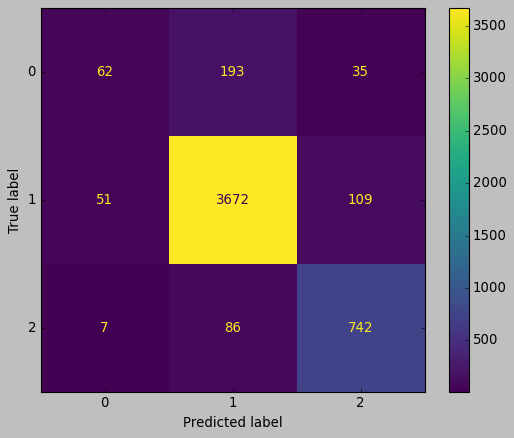

In [143]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [144]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

/home/arafat/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/arafat/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [145]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [146]:
y_pred = grid.predict(x_test)
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 90.34%


In [147]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[  77  180   33]
 [  70 3653  109]
 [   7   80  748]]


              precision    recall  f1-score   support

           0       0.50      0.27      0.35       290
           1       0.93      0.95      0.94      3832
           2       0.84      0.90      0.87       835

    accuracy                           0.90      4957
   macro avg       0.76      0.70      0.72      4957
weighted avg       0.89      0.90      0.90      4957



In [148]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [149]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 90.01%


In [150]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[  84  176   30]
 [  86 3631  115]
 [   8   80  747]]


              precision    recall  f1-score   support

           0       0.47      0.29      0.36       290
           1       0.93      0.95      0.94      3832
           2       0.84      0.89      0.87       835

    accuracy                           0.90      4957
   macro avg       0.75      0.71      0.72      4957
weighted avg       0.89      0.90      0.89      4957



In [151]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [152]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 90.01%


In [153]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[  84  176   30]
 [  86 3631  115]
 [   8   80  747]]


              precision    recall  f1-score   support

           0       0.47      0.29      0.36       290
           1       0.93      0.95      0.94      3832
           2       0.84      0.89      0.87       835

    accuracy                           0.90      4957
   macro avg       0.75      0.71      0.72      4957
weighted avg       0.89      0.90      0.89      4957

